# 4. Which Weekday People Bike the Most Using Groupby and Aggregate

We're going to be looking some cyclist data from Montréal. Here's the original page (in French), but it's already included in this repository. We're using the data from 2012.

http://donnees.ville.montreal.qc.ca/dataset/velos-comptage

This dataset is a list of how many people were on 7 different bike paths in Montreal, each day.

In [2]:
#---Step 0: Import necessary libraries and render plots inline---

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['font.family'] = 'sans-serif'

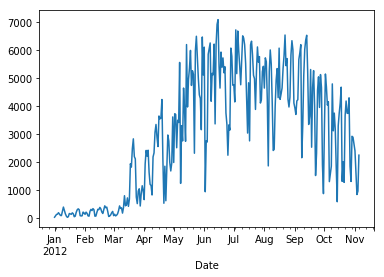

In [3]:
#---Step 1: Read in CSV file with appropriate parsing arguments---

# Change column separator to ";"
# Set encoding to Latin-1 instead of UTF-8
# Parse dates in the "Date" column
# Tell it that dates have the day first instead of the month first (EU standard)
# Set index to be the "Date" column

bikes = pd.read_csv("/Users/cheon/pandas-cookbook-practice/data/bikes.csv", sep=";", encoding="Latin-1", parse_dates=["Date"], dayfirst=True, index_col="Date")

bikes["Berri 1"].plot()

In [4]:
#---Step 2: Create dataframe with just the Berri bikepath---

berri_1 = pd.DataFrame(bikes.loc[:, "Berri 1"])

berri_1.head()

,Berri 1
Date,
2012-01-01,35
2012-01-02,83
2012-01-03,135
2012-01-04,144
2012-01-05,197


Next, we need to add a 'weekday' column.

Firstly, we can get the weekday from the index. We haven't talked about indexes yet, but the index is what's on the left on the above dataframe, under 'Date'.

It's basically all the days of the year.

In [5]:
berri_1.index

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2012-10-27', '2012-10-28', '2012-10-29', '2012-10-30',
               '2012-10-31', '2012-11-01', '2012-11-02', '2012-11-03',
               '2012-11-04', '2012-11-05'],
              dtype='datetime64[ns]', name='Date', length=310, freq=None)

You can see that actually some of the days are missing -- only 310 days of the year are actually there. Who knows why.

Pandas has a bunch of really great time series functionality, so if we wanted to get the day of the month for each row, we could do it like this:

In [6]:
berri_1.index.day

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
            27, 28, 29, 30, 31,  1,  2,  3,  4,  5],
           dtype='int64', name='Date', length=310)

We actually want the weekday, though:

In [7]:
berri_1.index.weekday

Int64Index([6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
            ...
            5, 6, 0, 1, 2, 3, 4, 5, 6, 0],
           dtype='int64', name='Date', length=310)

These are the days of the week, where 0 is Monday. I found out that 0 was Monday by checking on a calendar.

Now that we know how to get the weekday, we can add it as a column in our dataframe like this:

In [8]:
berri_1["weekday"] = berri_1.index.weekday

berri_1.head()

,Berri 1,weekday
Date,,
2012-01-01,35,6
2012-01-02,83,0
2012-01-03,135,1
2012-01-04,144,2
2012-01-05,197,3


We can easily add up the number of cyclists by weekday using the dataframe .groupby() method (similar to SQL groupby)

In this case, berri_1.groupby('weekday').aggregate(sum) means "Group the rows by weekday and then add up all the values with the same weekday".

In [13]:
berri_1.head()

,Berri 1,weekday
Date,,
2012-01-01,35,6
2012-01-02,83,0
2012-01-03,135,1
2012-01-04,144,2
2012-01-05,197,3


In [10]:
weekday_counts = berri_1.groupby('weekday').aggregate(["sum"])

weekday_counts

,Berri 1
,sum
weekday,
0,134298
1,135305
2,152972
3,160131
4,141771
5,101578
6,99310


In [15]:
# Alternative method
test_counts = berri_1.groupby('weekday').aggregate({"Berri 1" : "sum"})

test_counts

,Berri 1
weekday,
0,134298
1,135305
2,152972
3,160131
4,141771
5,101578
6,99310


In [11]:
weekday_counts.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

weekday_counts

,Berri 1
,sum
Monday,134298
Tuesday,135305
Wednesday,152972
Thursday,160131
Friday,141771
Saturday,101578
Sunday,99310


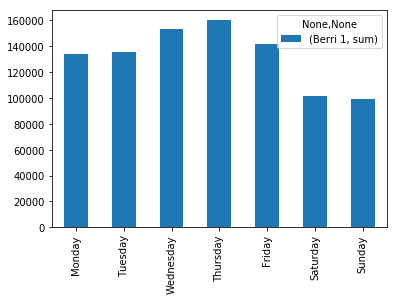

In [12]:
weekday_counts.plot(kind="bar")